<a href="https://colab.research.google.com/github/HungPham2002/Non-Linear-Regression-to-Multivariable-non-Linear-Regression/blob/main/Multivariate_Non_Linear_Regresion_Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/AI_VIETNAM/AIO2023/ML/Non-Linear-Regression

/content/drive/MyDrive/AI_VIETNAM/AIO2023/ML/Non-Linear-Regression


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#1.Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIO Project/Linear (non Linear) Regression    Sales Prediction/data/Fish.csv')
df

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<ipython-input-14-2c2b0a38db0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


Text(0.5, 1.0, 'Correlation Matrix')

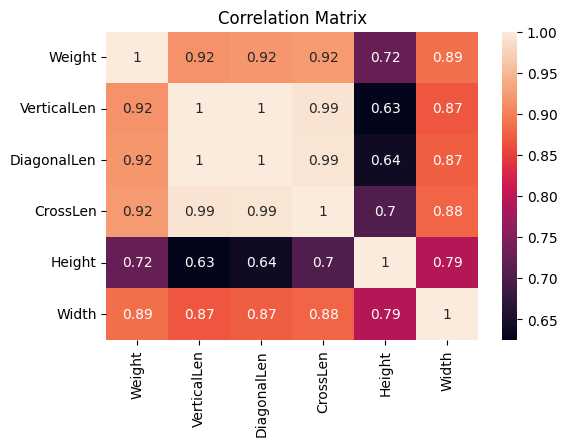

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

**One hot encoding**

In [ ]:
encode_species = pd.get_dummies(df.Species)
encode_species.head(5)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


**Label Encoding**

In [ ]:
df["Species"] = df["Species"].astype('category')
label_ecnoding_species = df["Species"].cat.codes
label_ecnoding_species

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Length: 159, dtype: int8

In [ ]:
new_df = pd.concat([df, encode_species], axis='columns')
new_df

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [ ]:
X = new_df[[
    'VerticalLen', 'DiagonalLen', 'CrossLen', 'Height', 'Width',
    'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'
]]
y = new_df['Weight']

In [ ]:
X = X.values
y = y.values

In [ ]:
X_data = np.hstack((np.ones((X.shape[0], 1)), X))
X_data

array([[ 1. , 23.2, 25.4, ...,  0. ,  0. ,  0. ],
       [ 1. , 24. , 26.3, ...,  0. ,  0. ,  0. ],
       [ 1. , 23.9, 26.5, ...,  0. ,  0. ,  0. ],
       ...,
       [ 1. , 12.1, 13. , ...,  0. ,  1. ,  0. ],
       [ 1. , 13.2, 14.3, ...,  0. ,  1. ,  0. ],
       [ 1. , 13.8, 15. , ...,  0. ,  1. ,  0. ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (127, 13)
X_test shape:  (32, 13)
y_train shape:  (127,)
y_test shape:  (32,)


#2.Linear Regression

In [ ]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

In [ ]:
class LinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.00001, num_epochs=10000):
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_samples = self.X_data.shape[0]

        # Initial Coefficients
        self.theta = np.random.randn(self.X_data.shape[1])
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)*(y_pred-y_target)
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            k = 2*(y_pred-self.y_target)
            gradients = self.X_data.T.dot(k)/self.num_samples

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [ ]:
linear_model = LinearRegression(X_train, y_train, learning_rate=0.00001, num_epochs=100000)
linear_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 95000 - Loss: 30404.344276582277
Epoch: 95001 - Loss: 30404.230376404328
Epoch: 95002 - Loss: 30404.116477117404
Epoch: 95003 - Loss: 30404.00257872152
Epoch: 95004 - Loss: 30403.888681216646
Epoch: 95005 - Loss: 30403.774784602774
Epoch: 95006 - Loss: 30403.660888879916
Epoch: 95007 - Loss: 30403.546994048036
Epoch: 95008 - Loss: 30403.433100107144
Epoch: 95009 - Loss: 30403.31920705723
Epoch: 95010 - Loss: 30403.205314898292
Epoch: 95011 - Loss: 30403.091423630314
Epoch: 95012 - Loss: 30402.977533253284
Epoch: 95013 - Loss: 30402.8636437672
Epoch: 95014 - Loss: 30402.749755172063
Epoch: 95015 - Loss: 30402.635867467852
Epoch: 95016 - Loss: 30402.52198065457
Epoch: 95017 - Loss: 30402.408094732193
Epoch: 95018 - Loss: 30402.29420970074
Epoch: 95019 - Loss: 30402.18032556018
Epoch: 95020 - Loss: 30402.066442310504
Epoch: 95021 - Loss: 30401.952559951733
Epoch: 95022 - Loss: 30401.83867848383
Epoch: 95023 - Loss: 30401.7247

{'loss': 37140.54165989276,
 'weight': array([-99.6444892 ,  34.0697154 ,  12.33156157, -27.36323827,
         13.76394411,   7.54508628,  15.39128205, -22.93925475,
        -31.3344862 ,   2.37805617, -47.01259774, -18.08058833,
          1.41259191])}

In [ ]:
preds = linear_model.predict(X_train)
r2score(preds, y_train)

0.7572093586417419

In [ ]:
preds = linear_model.predict(X_test)
r2score(preds, y_test)

0.7704795701354439

#3.Polynomial Regression

##3.1.Simple Approach
**Form**
$(a+b)^2 => a^2 + b^2 + a + b + 1$

In [ ]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_mem = []
    for X_sub in X.T:
        X_sub = X_sub.T
        X_new = X_sub
        for d in range(2, degree+1):
            X_new = np.c_[X_new, np.power(X_sub, d)]
        X_mem.extend(X_new.T)
    return np.c_[X_mem].T

In [ ]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[ 23.2 , 538.24,  25.4 , ...,   0.  ,   0.  ,   0.  ],
       [ 24.  , 576.  ,  26.3 , ...,   0.  ,   0.  ,   0.  ],
       [ 23.9 , 571.21,  26.5 , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [ 12.1 , 146.41,  13.  , ...,   1.  ,   0.  ,   0.  ],
       [ 13.2 , 174.24,  14.3 , ...,   1.  ,   0.  ,   0.  ],
       [ 13.8 , 190.44,  15.  , ...,   1.  ,   0.  ,   0.  ]])

In [ ]:
X_poly.shape

(159, 24)

In [ ]:
X_data = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_data

array([[  1.  ,  23.2 , 538.24, ...,   0.  ,   0.  ,   0.  ],
       [  1.  ,  24.  , 576.  , ...,   0.  ,   0.  ,   0.  ],
       [  1.  ,  23.9 , 571.21, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  1.  ,  12.1 , 146.41, ...,   1.  ,   0.  ,   0.  ],
       [  1.  ,  13.2 , 174.24, ...,   1.  ,   0.  ,   0.  ],
       [  1.  ,  13.8 , 190.44, ...,   1.  ,   0.  ,   0.  ]])

In [ ]:
X_data.shape, y.shape

((159, 25), (159,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_test.shape)

X_train shape:  (127, 25)
X_test shape:  (32, 25)
y_train shape:  (127,)
y_train shape:  (32,)


In [ ]:
poly_model = LinearRegression(X_train, y_train, learning_rate=0.0000001, num_epochs=100000)
poly_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 95000 - Loss: 4116.451517094234
Epoch: 95001 - Loss: 4116.438303198922
Epoch: 95002 - Loss: 4116.425089500164
Epoch: 95003 - Loss: 4116.41187599794
Epoch: 95004 - Loss: 4116.398662692254
Epoch: 95005 - Loss: 4116.3854495831
Epoch: 95006 - Loss: 4116.372236670475
Epoch: 95007 - Loss: 4116.359023954381
Epoch: 95008 - Loss: 4116.345811434803
Epoch: 95009 - Loss: 4116.332599111744
Epoch: 95010 - Loss: 4116.319386985204
Epoch: 95011 - Loss: 4116.306175055169
Epoch: 95012 - Loss: 4116.292963321645
Epoch: 95013 - Loss: 4116.279751784622
Epoch: 95014 - Loss: 4116.266540444096
Epoch: 95015 - Loss: 4116.253329300072
Epoch: 95016 - Loss: 4116.240118352533
Epoch: 95017 - Loss: 4116.226907601488
Epoch: 95018 - Loss: 4116.213697046928
Epoch: 95019 - Loss: 4116.200486688848
Epoch: 95020 - Loss: 4116.187276527247
Epoch: 95021 - Loss: 4116.174066562116
Epoch: 95022 - Loss: 4116.16085679345
Epoch: 95023 - Loss: 4116.147647221263
Epoch: 9502

{'loss': 5692.285775980032,
 'weight': array([-1.25584399, -1.86643604,  0.33073253, -4.00128727,  0.92564183,
        -2.37682012, -0.67972626, -0.11185432,  2.03983418, -0.9708781 ,
         3.44365877,  0.53689479, -1.38014262, -0.87929074,  1.05835086,
        -0.49128319, -0.27246796,  0.45407385, -2.47109961, -1.46314249,
         0.53270396,  0.50649083, -0.05806555,  0.58244988, -1.67139243])}

In [ ]:
preds = poly_model.predict(X_train)
r2score(preds, y_train)

0.9670314627088964

In [ ]:
preds = poly_model.predict(X_test)
r2score(preds, y_test)

0.9731478301040352

##3.2.Advanced Approach
**Form**
$(a+b)^2 => a^2 + b^2 + ab + a + b + 1$

In [ ]:
class PolynomialFeaturesForDegree():
    '''
    Calculates the polynomial features of a dataset for a given degree.

    Args:
        degree (int): The degree of the polynomial features to be calculated.

    Attributes:
        degree (int): The degree of the polynomial features to be calculated.
        options (list): A list containing n-tuples specifying the exponent of each
                        feature in the dataset for each term in the polynomial
                        expansion.
    '''

    def __init__(self, degree):
        self.degree = degree
        self.options = []


    def display_terms(self):
        '''
        If a training instance has three features, i.e. [a,b,c], and (0,0,2) is
        displayed this indicates that a^0 * b^0 * c^2 is a term in the polynomial
        expansion of the dataset.
        '''

        print('Exponents of features at each index:')
        for i in sorted(self.options):
            print(i)


    def get_terms(self, features):
        m = features.shape[1]

        # Determines the number of possible combinations with a summation of m
        # variables raised to power n.
        num = (self.degree+1)**m
        ls = [0] * m

        # Calculate all possible combinations of the features in the dataset.
        for x in range(1,num):
            for idx in range(len(ls)-1, -1, -1):
                if ls[idx] == 0:
                    ls[idx] += 1
                    break
                elif ls[idx] % self.degree == 0:
                    ls[idx] = 0
                    if ls[idx - 1] != self.degree:
                        ls[idx-1] += 1
                        break
                    else:
                        deficit = -1
                        stop = False
                        while not stop and (idx + deficit) > -1:
                            if ls[idx + deficit] != self.degree:
                                ls[idx + deficit] += 1
                                stop = True
                            else:
                                ls[idx + deficit] = 0
                                deficit -= 1
                        break
                elif idx == (len(ls) - 1):
                    ls[idx] += 1
                    break

            # This is the Kronecker Delta Function used to eliminate terms that
            # do not form part of the polynomial expansion.
            if sum(ls) == self.degree:
                self.options.append(tuple(ls))


    def get_polynomial_features(self, features):
        # Calculate the terms in the polynomial expansion.
        self.get_terms(features)

        poly_features  = np.empty((len(features),0))
        feature_ls = []

        # Add vector of ones for degree zero.
        for i in range(features.shape[1]):
            feature_ls.append(features[:,i].reshape(-1,1))

        # Add the polynomial features to the dataset.
        for i,tup in enumerate(self.options):
            vector = np.full((len(features), 1), 1)

            # Calculate polynomial feature.
            vector = np.float_(vector)
            for feature_idx, exp in enumerate(tup):
                vector *= feature_ls[feature_idx] ** exp

            # Append polynomial feature to the dataset.
            poly_features = np.c_[poly_features,vector]

        return poly_features



class PolynomialFeatures():
    '''
    Calculates the polynomial features for all degrees up to and including the
    specified degree.

    Args:
        degree (int): The highest degree polynomial features to be calculated.

    Attributes:
        degree (int): The highest degree polynomial features to be calculated.
        transformers (list): A list containing one transformer for each degree
                            for which polynomial features are to be calculated.
    '''

    def __init__(self, degree):
        self.degree = degree

    def fit(self):
        self.transformers = []
        # Add one transformer for each degree.
        for i in range(1, self.degree + 1):
            self.transformers.append(PolynomialFeaturesForDegree(i))

    def transform(self,dataset):
        try:
            temp = np.ones((len(dataset),1))
            # Calculate and add polynomial features for each degree to the dataset.
            for t in self.transformers:
                features_for_deg = t.get_polynomial_features(dataset)
                temp = np.c_[temp, features_for_deg]
            return temp
        except AttributeError:
            print('Transformer not fitted, call \'fit\' with appropriate arguments before using transformer.')

In [ ]:
poly_feature = PolynomialFeatures(2)
poly_feature.fit()
X_data = poly_feature.transform(X)

In [ ]:
# X_data has bias
X_data

array([[  1.  ,   0.  ,   0.  , ..., 696.  , 589.28, 538.24],
       [  1.  ,   0.  ,   0.  , ..., 748.8 , 631.2 , 576.  ],
       [  1.  ,   0.  ,   0.  , ..., 743.29, 633.35, 571.21],
       ...,
       [  1.  ,   0.  ,   1.  , ..., 166.98, 157.3 , 146.41],
       [  1.  ,   0.  ,   1.  , ..., 200.64, 188.76, 174.24],
       [  1.  ,   0.  ,   1.  , ..., 223.56, 207.  , 190.44]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_test.shape)

X_train shape:  (127, 91)
X_test shape:  (32, 91)
y_train shape:  (127,)
y_train shape:  (32,)


In [ ]:
poly_model = LinearRegression(X_train, y_train, learning_rate=0.0000001, num_epochs=100000)
poly_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 95000 - Loss: 2670.1540677619096
Epoch: 95001 - Loss: 2670.149379553061
Epoch: 95002 - Loss: 2670.144691435676
Epoch: 95003 - Loss: 2670.1400034097633
Epoch: 95004 - Loss: 2670.1353154753388
Epoch: 95005 - Loss: 2670.1306276323844
Epoch: 95006 - Loss: 2670.1259398809148
Epoch: 95007 - Loss: 2670.121252220886
Epoch: 95008 - Loss: 2670.1165646523145
Epoch: 95009 - Loss: 2670.1118771752294
Epoch: 95010 - Loss: 2670.107189789604
Epoch: 95011 - Loss: 2670.1025024954342
Epoch: 95012 - Loss: 2670.097815292715
Epoch: 95013 - Loss: 2670.0931281814314
Epoch: 95014 - Loss: 2670.088441161629
Epoch: 95015 - Loss: 2670.0837542332524
Epoch: 95016 - Loss: 2670.0790673963256
Epoch: 95017 - Loss: 2670.074380650839
Epoch: 95018 - Loss: 2670.069693996774
Epoch: 95019 - Loss: 2670.0650074341684
Epoch: 95020 - Loss: 2670.0603209630026
Epoch: 95021 - Loss: 2670.0556345832324
Epoch: 95022 - Loss: 2670.050948294925
Epoch: 95023 - Loss: 2670.046262

{'loss': 3535.6792761987454,
 'weight': array([ 1.25505521, -1.06576797,  2.16350761,  0.37774009,  1.01861107,
        -0.82611133, -0.42898345,  0.48730449, -0.94720462,  0.58298179,
        -3.62152411, -3.11898944, -3.14461164,  0.40542861,  0.13933846,
         0.41049276, -0.02692099,  1.54969885, -0.02590908,  0.12760855,
         0.90520331, -1.2771094 , -1.65086876, -1.13393784,  0.91742864,
        -0.58843872, -0.08189876, -0.46563968,  0.41083973, -0.27311819,
         0.27122069,  0.90681646,  0.14133901,  1.43959421, -0.78268321,
         1.06362921, -0.15820539, -1.30143807,  0.12174502, -0.26815951,
        -0.47970474, -1.70230099,  0.86315449, -1.92685813,  0.76036376,
         0.16640316, -0.06311576, -0.35456707, -0.97565091,  0.29085947,
        -0.67831833,  0.2138033 , -0.80758987, -0.45964669, -0.59474505,
         1.20822957, -2.23672646,  0.65315466, -1.22577689, -0.01469431,
        -1.26039549, -1.74355559, -1.07254279, -0.99705337, -0.31847251,
         1.9

In [ ]:
preds = poly_model.predict(X_train)
r2score(preds, y_train)

0.9784605795515806

In [ ]:
preds = poly_model.predict(X_test)
r2score(preds, y_test)

0.978709673258499